In [9]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [10]:
x = sp.symbols('x')
f_x = sp.Piecewise((x + 1, (x > -1) & (x < 0)), (1, (x >= 0) & (x < 1)))
L = 2
a_0 = (2 / L) * sp.integrate(f_x, (x, -1, 1))
a_n_sum = 0
b_n_sum = 0
N = 50

In [11]:
for n in range(1, N + 1):
    a_n = (2 / L) * sp.integrate(f_x * sp.cos(2 * sp.pi * n * x / L), (x, -1, 1))
    b_n = (2 / L) * sp.integrate(f_x * sp.sin(2 * sp.pi * n * x / L), (x, -1, 1))
    
    a_n_sum += a_n * sp.cos(2 * sp.pi * n * x / L)
    b_n_sum += b_n * sp.sin(2 * sp.pi * n * x / L)

In [12]:
fourier_series = a_0 / 2 + a_n_sum + b_n_sum
f_fourier = sp.lambdify(x, fourier_series, 'numpy')
x_values = np.linspace(-1, 1, 1000)
y_values = [f_fourier(x_val) for x_val in x_values]
y_values_true = [f_x.subs(x, x_val) for x_val in x_values]

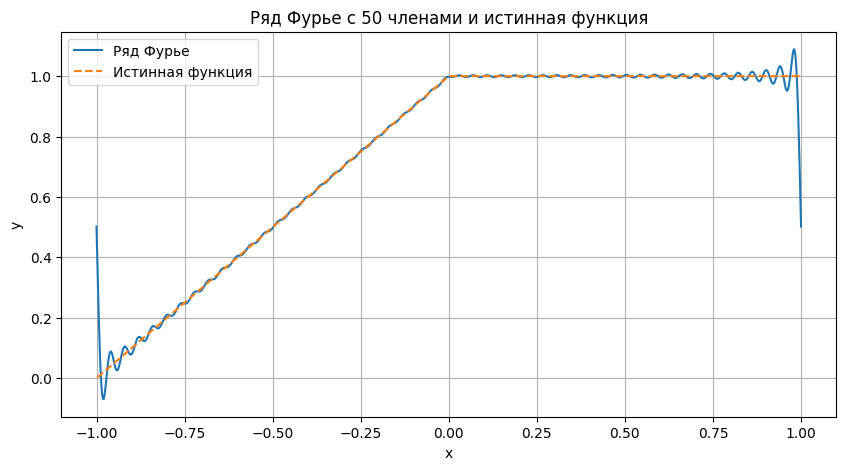

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='Ряд Фурье')
plt.plot(x_values, y_values_true, label='Истинная функция', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Ряд Фурье с {N} членами и истинная функция')
plt.legend()
plt.grid(True)
plt.show()